# Preparação do ambiente e carregamendo dos dados

In [180]:
# Carregamento dos pacotes que serão utilizados

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Código de utilização no kaggle para upload dos dados
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_ready.csv
/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_fullcopy.csv
/kaggle/input/exoplanet-full-data-set-july-2022/README.md
/kaggle/input/exoplanet-full-data-set-july-2022/Data columns in Kepler Objects of Interest Table.pdf


In [181]:
#carregamento do dataset completo
df_exoplanets_full = pd.read_csv('/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_ready.csv')
print('Carregamento completo. O Shape do dataset completo é ' + str(df_exoplanets_full.shape))

Carregamento completo. O Shape do dataset completo é (9564, 141)


# Tratamento dos dados

#### Criação do dataset de dados - realizando o drop dos atributos que não serão utilizados no treinamento
#### Atributos retirados da tabela incluem valores de erros e datas irrelevantes

In [182]:

df_exoplanets_data = df_exoplanets_full.drop(['koi_pdisposition',
                                              'koi_vet_stat',
                                              'koi_vet_date',
                                              'koi_disp_prov',
                                              'koi_comment',
                                              'koi_period_err1',
                                              'koi_period_err2',
                                              'koi_time0bk',
                                              'koi_time0bk_err1',
                                              'koi_time0bk_err2',
                                              'koi_time0',
                                              'koi_time0_err1',
                                              'koi_time0_err2',
                                              'koi_eccen_err1',
                                              'koi_eccen_err2',
                                              'koi_longp_err1',
                                              'koi_longp_err2',
                                              'koi_impact_err1',
                                              'koi_impact_err2',
                                              'koi_duration_err1',
                                              'koi_duration_err2',
                                              'koi_ingress_err1',
                                              'koi_ingress_err2',
                                              'koi_depth_err1',
                                              'koi_depth_err2',
                                              'koi_ror_err1',
                                              'koi_ror_err2',
                                              'koi_srho_err1',
                                              'koi_srho_err2',
                                              'koi_fittype',
                                              'koi_prad_err1',
                                              'koi_prad_err2',
                                              'koi_sma_err1',
                                              'koi_sma_err2',
                                              'koi_incl_err1',
                                              'koi_incl_err2',
                                              'koi_teq_err1',
                                              'koi_teq_err2',
                                              'koi_insol',
                                              'koi_insol_err1',
                                              'koi_insol_err2',
                                              'koi_dor',
                                              'koi_dor_err1',
                                              'koi_dor_err2',
                                              'koi_limbdark_mod',
                                              'koi_parm_prov',
                                              'koi_tce_plnt_num',
                                              'koi_tce_delivname',
                                              'koi_quarters',
                                              'koi_bin_oedp_sig',
                                              'koi_trans_mod',
                                              'koi_model_dof',
                                              'koi_model_chisq',
                                              'koi_datalink_dvr',
                                              'koi_datalink_dvs',
                                              'koi_steff_err1',
                                              'koi_steff_err2',
                                              'koi_slogg_err1',
                                              'koi_slogg_err2',
                                              'koi_smet_err1',
                                              'koi_smet_err2',
                                              'koi_srad_err1',
                                              'koi_srad_err2',
                                              'koi_smass_err1',
                                              'koi_smass_err2',
                                              'koi_sage_err1',
                                              'koi_sage_err2',
                                              'koi_sparprov',
                                              'koi_fwm_stat_sig',
                                              'koi_fwm_sra',
                                              'koi_fwm_sra_err',
                                              'koi_fwm_sdec',
                                              'koi_fwm_sdec_err',
                                              'koi_fwm_srao',
                                              'koi_fwm_srao_err',
                                              'koi_fwm_sdeco',
                                              'koi_fwm_sdeco_err',
                                              'koi_fwm_prao',
                                              'koi_fwm_prao_err',
                                              'koi_fwm_pdeco',
                                              'koi_fwm_pdeco_err',
                                              'koi_dicco_mra',
                                              'koi_dicco_mra_err',
                                              'koi_dicco_mdec',
                                              'koi_dicco_mdec_err',
                                              'koi_dicco_msky',
                                              'koi_dicco_msky_err',
                                              'koi_dikco_mra',
                                              'koi_dikco_mra_err',
                                              'koi_dikco_mdec',
                                              'koi_dikco_mdec_err',
                                              'koi_dikco_msky',
                                              'koi_dikco_msky_err'
                                             ],axis=1)

print('O shape do dataset é ' + str(df_exoplanets_data.shape))
print('Total de colunas excluídas foi ' + str(df_exoplanets_full.shape[1]-df_exoplanets_data.shape[1]))

O shape do dataset é (9564, 48)
Total de colunas excluídas foi 93



### O atributo koi_disposition é o target
#### Ele apresenta 3 possibilidades: FALSE POSITIVE, CONFIRMED e CANDIDATE. 
- FALSE POSITIVE - Confirmado por outros métodos que 
- CONFIRMED - Confirmado como exoplaneta
- CANDIDATE - Ainda em avaliação

#### A base será separada em dois conjuntos:
- FALSE POSITIVE + CONFIRMED
- CANDIDATE

#### A primeira base será utilizada para treinamento e teste e, em um segundo momento, a base de candidatos poderá ser utlizada para verificação de quais objetos de interesse seriam confirmados como planetas utilizando o modelo

In [183]:
df_exoplanets_candidates = df_exoplanets_data.loc[df_exoplanets_data['koi_disposition']=='CANDIDATE']
df_exoplanets = df_exoplanets_data.loc[df_exoplanets_data['koi_disposition']!='CANDIDATE']



#### O DataFrame df_exoplanets será utilizado para treinamento e teste
##### Serão retiradas colunas que não interessam para o treinamento deixando apenas os alvos e os dados

In [184]:
df_exoplanets = df_exoplanets.drop(['rowid',
                                    'kepid',
                                    'kepoi_name',
                                    'kepler_name',
                                    'koi_score'
                                    ],axis=1)

#### Necessário preencher os valores Nulos no atributos ou verificar se existe relevancia nele.
##### De 42 atributos apenas 9 estão com todos os valores completos


In [185]:
df_exoplanets.isna().any()

koi_disposition     False
koi_fpflag_nt       False
koi_fpflag_ss       False
koi_fpflag_co       False
koi_fpflag_ec       False
koi_period          False
koi_eccen            True
koi_longp            True
koi_impact           True
koi_duration        False
koi_ingress          True
koi_depth            True
koi_ror              True
koi_srho             True
koi_prad             True
koi_sma              True
koi_incl             True
koi_teq              True
koi_ldm_coeff4       True
koi_ldm_coeff3       True
koi_ldm_coeff2       True
koi_ldm_coeff1       True
koi_max_sngle_ev     True
koi_max_mult_ev      True
koi_model_snr        True
koi_count           False
koi_num_transits     True
koi_steff            True
koi_slogg            True
koi_smet             True
koi_srad             True
koi_smass            True
koi_sage             True
ra                  False
dec                 False
koi_kepmag           True
koi_gmag             True
koi_rmag             True
koi_imag    

#### Atributo koi_eccen
#### Coluna apenas com zeros - retirada do modelo

In [186]:
print(df_exoplanets.koi_eccen.describe())
df_exoplanets = df_exoplanets.drop(['koi_eccen'],axis=1)

count    7250.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: koi_eccen, dtype: float64


#### Atributo koi_longp
#### Coluna apenas com valores nulos - retirada do modelo

In [187]:
print(df_exoplanets.koi_longp.describe())
df_exoplanets = df_exoplanets.drop(['koi_longp'],axis=1)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: koi_longp, dtype: float64


#### Atributo koi_impact
#### Atributos com valores Outliers - Necessário tratamento

In [188]:
print(df_exoplanets.koi_impact.describe())
df_exoplanets.koi_impact.isna().any()
#df_exoplanets.koi_impact.plot(kind="box")
#plt.show()

count    7250.000000
mean        0.758169
std         3.212828
min         0.000000
25%         0.227000
50%         0.586000
75%         0.917675
max       100.806000
Name: koi_impact, dtype: float64


True

#### Atributo koi_ingress
#### Coluna apenas com valores nulos - retirada do modelo

In [189]:
print(df_exoplanets.koi_ingress.describe())
df_exoplanets = df_exoplanets.drop(['koi_ingress'],axis=1)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: koi_ingress, dtype: float64


#### Atributo koi_depth
#### Atributos com valores Outliers - Necessário tratamento

True
count    7.250000e+03
mean     2.983129e+04
std      9.159879e+04
min      8.000000e-01
25%      1.826500e+02
50%      5.029500e+02
75%      2.380600e+03
max      1.541400e+06
Name: koi_depth, dtype: float64


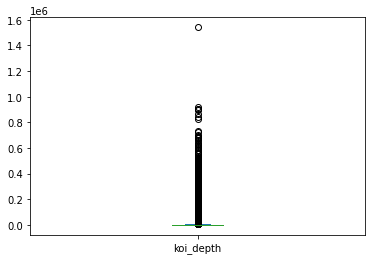

In [190]:
print(df_exoplanets.koi_depth.isna().any())
print(df_exoplanets.koi_depth.describe())
df_exoplanets.koi_depth.plot(kind='box')
plt.show()

#### Atributo koi_ror
#### Atributos com valores Outliers - Necessário tratamento

<AxesSubplot:>

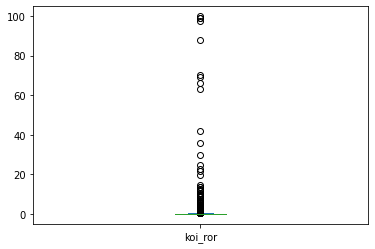

In [191]:
df_exoplanets.koi_ror.describe()
df_exoplanets.koi_ror.plot(kind='box')

#### Atributo koi_srho
#### Atributos com valores Outliers - Necessário tratamento

<AxesSubplot:>

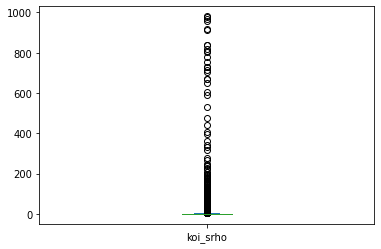

In [192]:
df_exoplanets.koi_srho.describe()
df_exoplanets.koi_srho.plot(kind='box')

#### Atributo koi_prad
#### Atributos com valores Outliers - Necessário tratamento

<AxesSubplot:>

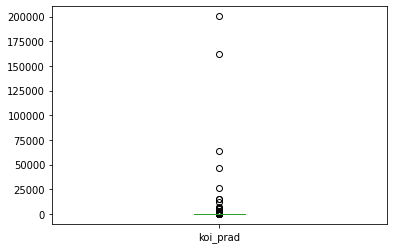

In [193]:
df_exoplanets.koi_prad.describe()
df_exoplanets.koi_prad.plot(kind='box')

#### Atributo koi_sma
#### Atributo corrigido inserindo valor médio nas colunas nulas

In [194]:
print(df_exoplanets.koi_sma.isna().any())
#df_exoplanets.koi_sma.describe()
#df_exoplanets.koi_sma.hist()
df_exoplanets.koi_sma.fillna(df_exoplanets.koi_sma.mean(), inplace=True)
print(df_exoplanets.koi_sma.isna().any())

True
False


#### Atributo koi_incl
#### Atributo corrigido inserindo valor médio nas colunas nulas

In [195]:
df_exoplanets.koi_incl.describe()
df_exoplanets.koi_incl.fillna(df_exoplanets.koi_incl.mean(), inplace=True)
df_exoplanets.koi_incl.isna().any()

False

#### Atributo koi_teq
#### Atributos com valores Outliers - Necessário tratamento

<AxesSubplot:>

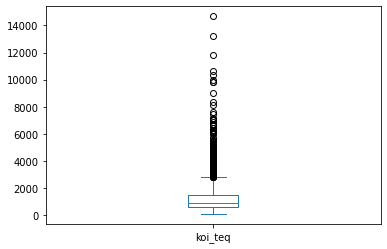

In [196]:
#df_exoplanets.koi_teq.describe()
df_exoplanets.koi_teq.plot(kind='box')

#### Atributo koi_ldm_coeff1 koi_ldm_coeff2 koi_ldm_coeff3 koi_ldm_coeff4
#### coeficiente 1 e 2 com médias inseridas
#### retirados coeficientes 3 e 4 - somente zeros

In [197]:
print(df_exoplanets[['koi_ldm_coeff1','koi_ldm_coeff2','koi_ldm_coeff3','koi_ldm_coeff4']].describe())
df_exoplanets.koi_ldm_coeff1.fillna(df_exoplanets.koi_ldm_coeff1.mean(), inplace=True)
df_exoplanets.koi_ldm_coeff2.fillna(df_exoplanets.koi_ldm_coeff2.mean(), inplace=True)
df_exoplanets = df_exoplanets.drop(['koi_ldm_coeff3','koi_ldm_coeff4'], axis=1)


       koi_ldm_coeff1  koi_ldm_coeff2  koi_ldm_coeff3  koi_ldm_coeff4
count     7250.000000     7250.000000          7250.0          7250.0
mean         0.406333        0.254892             0.0             0.0
std          0.107135        0.065293             0.0             0.0
min          0.125400       -0.120600             0.0             0.0
25%          0.323900        0.229100             0.0             0.0
50%          0.386600        0.271100             0.0             0.0
75%          0.463900        0.299800             0.0             0.0
max          0.944300        0.464000             0.0             0.0


#### Atributo koi_max_sngle_ev
#### Atributos com valores Outliers - Necessário tratamento

In [198]:
df_exoplanets.koi_max_sngle_ev.describe()

count     6827.000000
mean       215.829866
std        851.446303
min          2.538761
25%          4.230003
50%          6.257362
75%         27.319057
max      22982.162000
Name: koi_max_sngle_ev, dtype: float64

#### Atributo koi_max_mult_ev
#### Atributos com valores Outliers - Necessário tratamento

In [199]:
df_exoplanets.koi_max_mult_ev.describe()

count      6827.000000
mean       1256.308970
std        4582.831122
min           7.105086
25%          12.934684
50%          24.318182
75%         129.223915
max      120049.680000
Name: koi_max_mult_ev, dtype: float64

#### Atributo koi_model_snr
#### Atributos com valores Outliers - Necessário tratamento

In [200]:
df_exoplanets.koi_model_snr.describe()

count    7250.000000
mean      321.512979
std       885.187587
min         0.000000
25%        15.400000
50%        30.800000
75%       117.000000
max      9054.700000
Name: koi_model_snr, dtype: float64

#### Atributo koi_num_transits
#### Valores completos com a média

In [201]:
df_exoplanets.koi_num_transits.fillna(df_exoplanets.koi_num_transits.mean(), inplace=True)

#### Atributo koi_steff
#### Valores completos com a média

In [202]:
df_exoplanets.koi_steff.fillna(df_exoplanets.koi_steff.mean(), inplace=True)

#### Atributo koi_slogg
#### Valores completos com a média

In [203]:
df_exoplanets.koi_slogg.fillna(df_exoplanets.koi_slogg.mean(), inplace=True)

#### Atributo koi_smet
#### Valores completos com a média

In [204]:
#df_exoplanets.koi_smet.describe()
#df_exoplanets.koi_smet.isna().sum()
df_exoplanets.koi_smet.fillna(df_exoplanets.koi_smet.mean(), inplace=True)

#### Atributo koi_srad
#### Atributos com valores Outliers - Necessário tratamento

In [205]:
df_exoplanets.koi_srad.describe()

count    7250.000000
mean        1.759367
std         6.311392
min         0.116000
25%         0.829000
50%         1.000000
75%         1.349000
max       229.908000
Name: koi_srad, dtype: float64

#### Atributo koi_smass
#### Valores completos com a média

In [206]:
#df_exoplanets.koi_smass.isna().sum()
#df_exoplanets.koi_smass.describe()
df_exoplanets.koi_smass.fillna(df_exoplanets.koi_smass.mean(), inplace=True)

#### Atributo koi_sage
#### Atributo retirado, apenas valores nulos

In [207]:
print(df_exoplanets.koi_sage.describe())
df_exoplanets = df_exoplanets.drop(['koi_sage'], axis=1)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: koi_sage, dtype: float64


#### Atributo koi_kepmag
#### Valores completos com a média

In [214]:
print(df_exoplanets.koi_kepmag.describe())
df_exoplanets.koi_kepmag.fillna(df_exoplanets.koi_kepmag.mean(), inplace=True)

count    7507.000000
mean       14.248763
std         1.402805
min         6.966000
25%        13.424000
50%        14.498000
75%        15.304500
max        20.003000
Name: koi_kepmag, dtype: float64


#### Atributo koi_gmag
#### Valores completos com a média

In [217]:
print(df_exoplanets.koi_gmag.describe())
df_exoplanets.koi_gmag.fillna(df_exoplanets.koi_gmag.mean(), inplace=True)

count    7474.000000
mean       14.815195
std         1.519401
min         7.225000
25%        13.876000
50%        15.036500
75%        15.926000
max        21.150000
Name: koi_gmag, dtype: float64


#### Atributo koi_rmag
#### Valores completos com a média

In [226]:
print(df_exoplanets.koi_rmag.describe())
df_exoplanets.koi_rmag.fillna(df_exoplanets.koi_rmag.mean(), inplace=True)

count    7501.000000
mean       14.206438
std         1.400502
min         7.101000
25%        13.374000
50%        14.448000
75%        15.258000
max        19.960000
Name: koi_rmag, dtype: float64


#### Atributo koi_imag
#### Valores completos com a média

In [228]:
print(df_exoplanets.koi_imag.describe())
df_exoplanets.koi_imag.fillna(df_exoplanets.koi_imag.mean(), inplace=True)

count    7381.000000
mean       14.064495
std         1.306962
min         7.627000
25%        13.285000
50%        14.298000
75%        15.045000
max        19.900000
Name: koi_imag, dtype: float64


#### Atributo koi_zmag
#### Valores completos com a média

In [231]:
print(df_exoplanets.koi_zmag.describe())
df_exoplanets.koi_zmag.fillna(df_exoplanets.koi_zmag.mean(), inplace=True)

count    6992.000000
mean       13.975821
std         1.236673
min         7.657000
25%        13.260000
50%        14.223000
75%        14.929250
max        17.403000
Name: koi_zmag, dtype: float64


#### Atributo koi_jmag
#### Valores completos com a média

In [234]:
print(df_exoplanets.koi_jmag.describe())
df_exoplanets.koi_jmag.fillna(df_exoplanets.koi_jmag.mean(), inplace=True)

count    7483.000000
mean       12.979900
std         1.305649
min         5.431000
25%        12.250000
50%        13.203000
75%        13.960000
max        17.372000
Name: koi_jmag, dtype: float64


#### Atributo koi_hmag
#### Valores completos com a média

In [236]:
print(df_exoplanets.koi_hmag.describe())
df_exoplanets.koi_hmag.fillna(df_exoplanets.koi_hmag.mean(), inplace=True)

count    7483.000000
mean       12.607977
std         1.282287
min         5.054000
25%        11.913000
50%        12.808000
75%        13.544000
max        17.615000
Name: koi_hmag, dtype: float64


#### Atributo koi_kmag
#### Valores completos com a média

In [238]:
print(df_exoplanets.koi_kmag.describe())
df_exoplanets.koi_kmag.fillna(df_exoplanets.koi_kmag.mean(), inplace=True)

count    7483.000000
mean       12.530341
std         1.282013
min         4.941000
25%        11.840000
50%        12.721000
75%        13.477500
max        17.038000
Name: koi_kmag, dtype: float64


In [239]:
df_exoplanets.isna().any()

koi_disposition     False
koi_fpflag_nt       False
koi_fpflag_ss       False
koi_fpflag_co       False
koi_fpflag_ec       False
koi_period          False
koi_impact           True
koi_duration        False
koi_depth            True
koi_ror              True
koi_srho             True
koi_prad             True
koi_sma             False
koi_incl            False
koi_teq              True
koi_ldm_coeff2      False
koi_ldm_coeff1      False
koi_max_sngle_ev     True
koi_max_mult_ev      True
koi_model_snr        True
koi_count           False
koi_num_transits    False
koi_steff           False
koi_slogg           False
koi_smet            False
koi_srad             True
koi_smass           False
ra                  False
dec                 False
koi_kepmag          False
koi_gmag            False
koi_rmag            False
koi_imag            False
koi_zmag            False
koi_jmag            False
koi_hmag            False
koi_kmag            False
dtype: bool

#### Verificando os tipos de dados dentro do dataframe temos somente o atributo Alvo como categórico
#### É necessário alterar os valores de falso positivo e confirmado para 0 e 1 respectivamente 

In [208]:
#df_exoplanets.koi_disposition

In [209]:
#le = preprocessing.LabelEncoder()
#le.fit(df_exoplanets.koi_disposition)

#y = le.transform(df_exoplanets.koi_disposition)

#X = df_exoplanets.iloc[:,1:(df_exoplanets.shape[1])]


In [210]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [211]:
#exoplanets_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
#exoplanets_tree = exoplanets_tree.fit(X_train, y_train)
#print("Acurácia (base de treinamento):", exoplanets_tree.score(X_train, y_train))